# Linear Multistep Methods 

A linear $k$-step method can be defined as 
\begin{equation}
    \label{eq:LMMs}
    \tag{LMMs}
    \sum\limits_{j=0}^k \alpha_j y_{n+j} = h \sum\limits_{j=0}^k \beta_j f_{n+j}, 
\end{equation}
where $\alpha_k \neq 0$ and $\alpha_0\beta_0 \neq 0$.  Usually the coefficient are normalized such that $\alpha_k = 1$ for uniqueness. 

## Order of Accuracy
### Definition 
First, we define the residual of a linear multistep method at time $t_{n+k}$ by substituting the exact solution $y(t)$ of the IVP problem into \eqref{eq:LMMs}, 
\begin{equation}
    \label{eq:res}
    \tag{Residual}
    r_n := \sum\limits_{j=0}^k \alpha_j y(t_{n+j}) - h \sum\limits_{j=0}^k \beta_j y'(t_{n+j}).
\end{equation}
A linear multistep method has order of acccuracy $p$ iff $r_n = \mathcal{O}(h^{p+1})$.  A linear multistep method is consist iff $p > 0$. 

### Order Condition 
To derive the order condition of a linear multistep method, we consider the Taylor expansion of $y(t_{n+j})$ and $y'(t_{n+j})$ at time $t_n$:
\begin{equation}
    y(t_{n+j}) = \sum\limits_{m = 0} \frac{j^m}{m!}y^{(m)}(t_n) h^m, \quad\text{and} y'(t_{n+j}) = \sum\limits_{m = 0} \frac{j^m}{m!}y^{(m+1)}(t_n) h^m.
\end{equation}
Then by the definition, we substitute these Taylor series into \eqref{eq:res},
\begin{align}
    r_n & = \sum\limits_{j=0}^k \alpha_j \sum\limits_{m = 0} \frac{j^m}{m!}y^{(m)}(t_n) h^m - h \sum\limits_{j=0}^k \beta_j \sum\limits_{m = 0} \frac{j^m}{m!}y^{(m+1)}(t_n) h^m \\
        & = \sum\limits_{j=0}^k\alpha_j y(t_n) + \sum\limits_{m=1}\frac{h^m}{m!}y^{(m)}(t_n)\left(\sum\limits_{j=0}^k\alpha_j j^m - m\sum\limits\beta_j j^{m-1}\right).
\end{align}
Therefor,  
* For consistency only, $\sum\limits_{j=0}^k \alpha_j$ = 0.
* For accuracy order of $p$: $\sum\limits_{j=0}^k \alpha_j = 0$, $\sum\limits_{j=0}^k\alpha_j j^m - m\sum\limits\beta_j j^{m-1} = 0$ (for $m = 1,\ldots,p)$, and $\sum\limits_{j=0}^k\alpha_j j^{p+1} - (p+1)\sum\limits\beta_j j^{p} \neq 0$.

If we express above order conditions with the notation of characteristic polynomials, then we have 
\begin{equation}
    \rho(e^z) - z\sigma(e^z) = \mathcal{O}(z^{p+1}).
\end{equation}
So, we have the following theorem:
#### Theorem
The multistep method is of order $p \geq 1$ if and only if there exists $c \neq 0$ such that
$$ \rho(r) - \sigma(r)\ln r = c(r-1)^{p+1} + \mathcal{O}\left(|r - 1|^{p+2}\right), \qquad r \to 1.$$
It is convenient to express the formula in the variable $\xi := r-1$, then the above formula becomes
$$ \rho(\xi+1) - \sigma(\xi+1)\ln (\xi+1) = c(\xi)^{p+1} + \mathcal{O}\left(\xi^{p+2}\right), \qquad xi \to 0.$$

### Examples

In [58]:
from sympy import *
init_printing()

z = symbols('z')

---
#### Example 1
The three step Adams-Bashforth method is given by 
$$ y_{n+3} = y_{n+2} + h\left(\frac{23}{12}f_{n+2} - \frac{4}{3}f_{n+1} + \frac{5}{12}f_n\right), $$
which has characteristic polynomials
$$ \rho(r) = r^3 - r^2 \qquad and \qquad \sigma(r) = \frac{1}{12}(23 r^2- 16 r + 5).$$
Then we have 
    $$ \rho(z+1) - \sigma(z+1)\ln(z+1) = $$

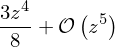

In [67]:
rho = (1+z)**3 - (1+z)**2
sigma = (23*(1+z)**2 - 16*(1+z) + 5)/12
expr = ln(1+z)

expand(rho - sigma*expr.series(z,0,5))

---
#### Example 2
The three step Adams-Moulton method is given by 
$$ y_{n+3} = y_{n+2} + h\left(\frac{3}{8}f_{n+3} + \frac{19}{24}f_{n+2} - \frac{5}{24}f_{n+1} + \frac{1}{24}f_n \right), $$
which has characteristic polynomials
$$ \rho(r) = r^3 - r^2 \qquad and \qquad \sigma(r) = \frac{1}{24}(9 r^3 + 19 r^2 - 5 r + 1).$$
Then we have 
    $$ \rho(z+1) - \sigma(z+1)\ln(z+1) = $$

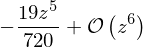

In [60]:
rho = (1+z)**3 - (1+z)**2
sigma = (9*(1+z)**3 + 19*(1+z)**2 - 5*(1+z) + 1)/24
expr = ln(1+z)

expand(rho - sigma*expr.series(z,0,6))

---
#### Example 3
The three step backward differentiation formula (BDF) is given by 
$$ y_{n+3} - \frac{18}{11}y_{n+2} + \frac{9}{11}y_{n+1} - \frac{2}{11}y_n = \frac{6}{11}h f_{n+3}, $$
which has characteristic polynomials
$$ \rho(r) = \frac{1}{11}(r^3 - 18 r^2 + 9 r - 2) \qquad and \qquad \sigma(r) = \frac{6}{11}r^3.$$
Then we have 
    $$ \rho(z+1) - \sigma(z+1)\ln(z+1) = $$

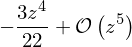

In [61]:
rho = (11*(1+z)**3 - 18*(1+z)**2 + 9*(1+z) -2)/11
sigma = 6*(1+z)**3/11
expr = ln(1+z)

expand(rho - sigma*expr.series(z,0,5))

---
#### Example 4
A three-step method (the three eighths scheme) is given by 
$$ u_{n+3} - u_n = \frac{3h}{8}\left(f_{n+3} + 3f_{n+2} + 3f_{n+1} + f_n\right), $$
which has characteristic polynomials
$$ \rho(r) = r^3 - 1 \qquad and \qquad \sigma(r) = \frac{3}{8}(r+1)^3.$$
Then we have 
    $$ \rho(z+1) - \sigma(z+1)\ln(z+1) = $$

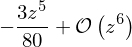

In [62]:

rho = (1+z)**3 - 1
sigma = 3*(2+z)**3/8
expr = ln(1+z)

expand(rho - sigma*expr.series(z,0,6))

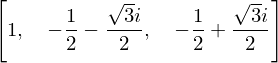

In [63]:
r = symbols('r')
poly(r**3-1,r).all_roots()

In [64]:
r_j = poly(r**3-1,r).all_roots()
[Abs(r_j[i]) for i in range(3)]